# Pip Installs and Imports

In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys
print(sys.executable)

c:\DA231X_master_thesis\.venv\Scripts\python.exe


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Setup

In [3]:
# should take the baseline model

# yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
# model = YOLO("yolov8n.pt")
model = YOLO("finetune.pt")

# Fine-Tuning

In [ ]:
results = model.train(
    data="small_dataset/data.yaml",
    epochs=100,
    patience=10,
    imgsz=640,
    batch=16,
)

Ultralytics 8.3.84  Python-3.11.9 torch-2.6.0+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=small_dataset/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning C:\DA231X_master_thesis\models\small_dataset\labels\train... 838 images, 0 backgrounds, 0 corrupt: 100%|██████████| 838/838 [00:00<00:00, 2414.14it/s]

train: WARNING  C:\DA231X_master_thesis\models\small_dataset\images\train\9560.jpg: 1 duplicate labels removed
train: WARNING  C:\DA231X_master_thesis\models\small_dataset\images\train\9572.jpg: 1 duplicate labels removed


train: New cache created: C:\DA231X_master_thesis\models\small_dataset\labels\train.cache


val: Scanning C:\DA231X_master_thesis\models\small_dataset\labels\val... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 2260.87it/s]

val: New cache created: C:\DA231X_master_thesis\models\small_dataset\labels\val.cache


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.655      2.185     0.9579        149        640:  85%|████████▍ | 45/53 [14:27<02:58, 22.26s/it]

# Testing


image 1/1 c:\DA231X_master_thesis\models\..\videos\test2.png: 352x640 1 boat, 1 jetski, 154.7ms
Speed: 1.5ms preprocess, 154.7ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


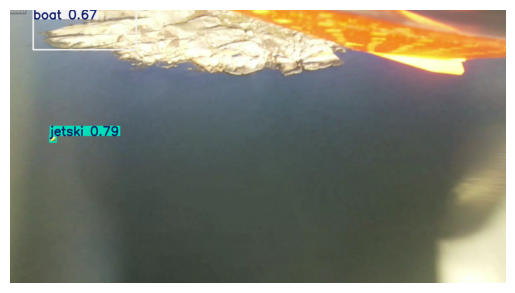

In [9]:
# results = model("seaDronesSee_yolo/images/val/5.jpg")
results = model("../videos/test2.png")

img = results[0].plot()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class index
        print(f"Class: {cls}, Confidence: {conf:.2f}, BBox: ({x1}, {y1}, {x2}, {y2})")

Class: 33, Confidence: 0.66, BBox: (404.6072082519531, 117.45033264160156, 440.6753234863281, 156.57469177246094)
Class: 33, Confidence: 0.55, BBox: (314.68743896484375, 295.2308044433594, 366.5202941894531, 325.59417724609375)
Class: 33, Confidence: 0.37, BBox: (508.86639404296875, 175.77047729492188, 523.189208984375, 189.0266571044922)
